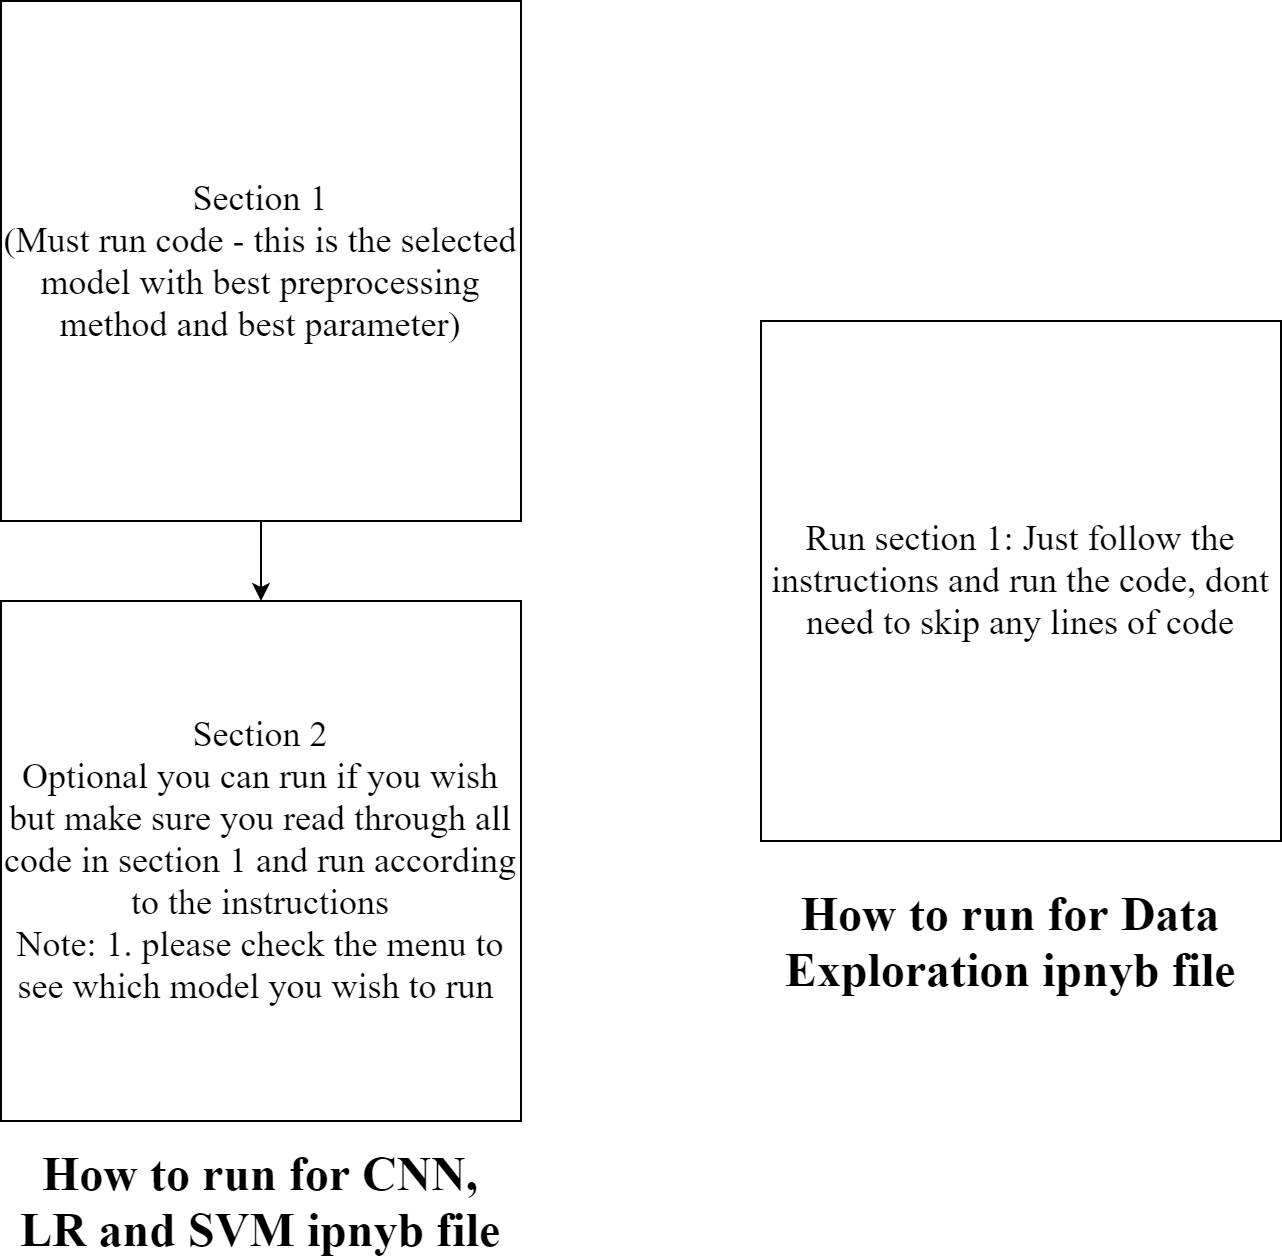

#SECTION 1

note ignore the warining if you are using jupyter notebook, the error is due to jupyter's html code

#Selected preprocessing and SVM model 

import libraries

In [ ]:
#libraries
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from statistics import mean

In [ ]:
# Download dataset of CIFAR-100 
(x_train,y_train),(x_test,y_test) = cifar100.load_data()
 
#print shape of the dataset
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
 
# print number of data set samples 
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')
 
# Data type for train and test set
print(type(x_test))
print(type(y_test[0]))



x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)
50000 train set
10000 test set
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


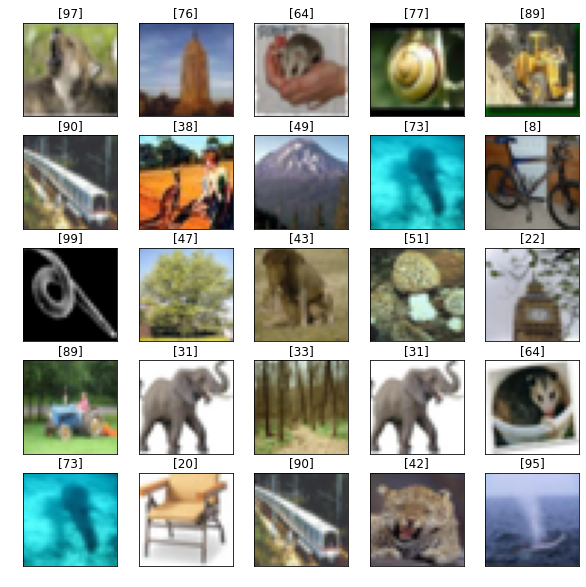

In [ ]:
# Show sample random image 5x5
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,100)
    cifar_image=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_num])
    # Erase the value of x tick and y tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # remove the tick x-axis and y-axis
    plt.tick_params(length=0)
    # print label
    plt.title(y_train[rand_num])
 
plt.show()

In [ ]:

%%time
#flipping image
#preprocess dataset

Datagenerator = ImageDataGenerator()

x_train1 = Datagenerator.apply_transform(x=x_train, transform_parameters={'flip_horizontal':True}) #flip image
x_test1 = Datagenerator.apply_transform(x=x_test, transform_parameters={'flip_horizontal':True}) #flip image


#add back to original input image
x_train = np.concatenate((x_train,x_train1))
x_test = np.concatenate((x_test,x_test1))
#append the label twice because the fiiped images is the same images just being flipped, it has the same index
y_train = np.concatenate((y_train,y_train))
y_test = np.concatenate((y_test,y_test))


Wall time: 282 ms


In [ ]:
%%time
# Normalize taining and test set image to the range of 0-1
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


Wall time: 2.17 s


In [ ]:
%%time
#split train into train and validation and keep test dataset as it is
x_train, x_valid, y_train , y_valid = train_test_split(x_train, y_train, 
                                                    train_size=0.70, 
                                                    random_state=42,
                                                    stratify=y_train)

Wall time: 1.79 s


In [ ]:
%%time
#convert 4d image into 2d form
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_valid = x_valid.reshape(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

Wall time: 2.02 s


In [ ]:
%%time
#reshape label to consist only a single column- classifier can only fit label that is of one column
y_train = y_train.reshape(y_train.shape[0])
y_valid = y_valid.reshape(y_valid.shape[0])
y_test = y_test.reshape(y_test.shape[0])

Wall time: 0 ns


#Subsample 40% Chossen model C 1.0, kernel = 'rbf'

subssetting

In [ ]:
%%time

#SUBSAMPLE 40%
x_train_sample1, x_train_sample2, y_train_sample1 , y_train_sample2 = train_test_split(x_train, y_train, 
                                                    train_size=0.40, 
                                                    random_state=42,
                                                    stratify=y_train)

x_valid_sample1, x_valid_sample2, y_valid_sample1 , y_valid_sample2 = train_test_split(x_valid, y_valid, 
                                                    train_size=0.40, 
                                                    random_state=42,
                                                    stratify=y_valid)


x_test_sample1, x_test_sample2, y_test_sample1 , y_test_sample2 = train_test_split(x_test, y_test, 
                                                    train_size=0.40, 
                                                    random_state=42,
                                                    stratify=y_test)

Wall time: 887 ms


Here is where the training begins

In [ ]:

%%time

#train SVM model with best parameters
clf2 = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
clf2.fit(x_train_sample1, y_train_sample1)

#score validation set
acc_result2 = clf2.score(x_valid_sample1, y_valid_sample1)
print('Validation Set Accuracy:', acc_result2)

#score test set
acc_result2 = clf2.score(x_test_sample1, y_test_sample1)
print('Test Set Accuracy:', acc_result2)


[LibSVM]Validation Set Accuracy: 0.13108333333333333
Test Set Accuracy: 0.126
Wall time: 1h 32min 51s


here is where the prediction part comes in 

get test score result

In [ ]:
%%time
#plot classification report
y_test_pred2 = clf2.predict(x_test_sample1)


print("accuracy on test set:")
print(accuracy_score(y_test_sample1, y_test_pred2))

print(classification_report(y_test_sample1, y_test_pred2))

accuracy on test set:
0.126
              precision    recall  f1-score   support

           0       0.34      0.36      0.35        80
           1       0.06      0.31      0.11        80
           2       0.10      0.01      0.02        80
           3       0.09      0.06      0.07        80
           4       0.04      0.04      0.04        80
           5       0.04      0.05      0.04        80
           6       0.06      0.04      0.05        80
           7       0.15      0.17      0.16        80
           8       0.11      0.10      0.11        80
           9       0.39      0.14      0.20        80
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00        80
          12       0.12      0.05      0.07        80
          13       0.06      0.04      0.05        80
          14       0.09      0.09      0.09        80
          15       0.11      0.04      0.06        80
          16       0.18      0.11      0.14        80

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


plot confusion matrix

plot confusion matrix, look at data exploration ipnyb file if you want to understand more about the labels according to the indices, you can run cm[class_index] if you want to find out confusion matrix for a particular class

In [ ]:
%%time
np.set_printoptions(threshold=np.inf)
y_test_pred2 = clf2.predict(x_test_sample1)
cm = confusion_matrix(y_test_sample1, y_test_pred2 )
print(cm)


[[29  4  0  0  2  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0
   3  0  0  0  0  0  0  0  2  2  0  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  1  1  5  0  0  0  2  0  0  0  0  4  0  0  0  0  0  0  0  4  0
   0  0  0  0  0  0  0  0  1  0  1  0  0  0  3  0  0  0  0  0  8  0  0  2
   0  0  0  0]
 [ 0 25  0  0  0  1  0  0  0  0  0  0  1  0  1  0  0  2  0  0  0  0  0  0
   0  0  0  1  0  0  1  0  0  1  1  0  3  2  0  0  0  0  0  3  0  0  1  2
   0  2  0  3  0  0  1  0  0  0  0  0  0  0  7  1  1  0  0  0  0  1  2  0
   0  2  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  9  2  0  0
   0  0  2  0]
 [ 0  5  1  0  1  2  0  1  0  0  0  0  0  0  0  0  0  1  0  1  4  3  0  5
   1  2  0  0  0  0  0  0  0  1  1  1  5  1  0  1  0  1  0  3  2  2  0  0
   0  1  0  1  0  3  7  0  0  0  1  0  0  2  0  1  2  0  0  0  1  1  0  1
   0  2  0  0  0  0  0  0  1  1  0  2  1  0  1  0  0  0  0  0  0  0  1  2
   0  2  1  0]
 [ 0  1  0  5  5  0  0  4  3  1  0  0  1  0  1  0  1  3  0  0  2  9

ROC CURVE

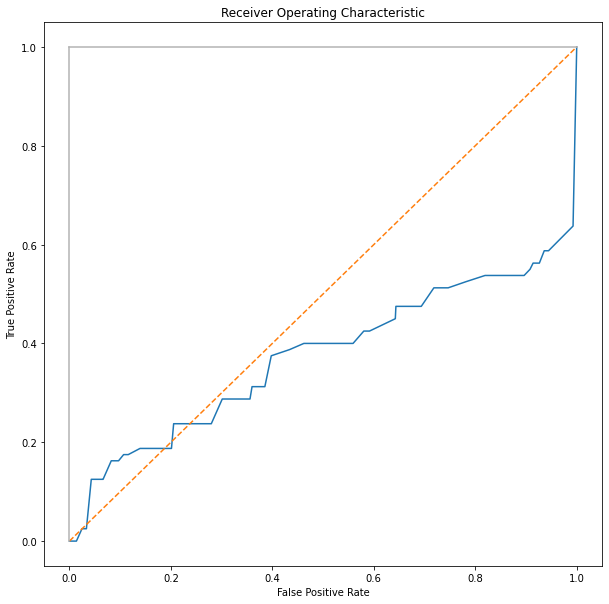

CPU times: user 197 ms, sys: 5 ms, total: 202 ms
Wall time: 201 ms


In [ ]:
%%time

false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_test_pred2, pos_label=0)

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#cross validation

#cross validation

In [ ]:
%%time
from sklearn import svm
# Evaluate with 10-Fold Cross Validation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
#metrics that i want to get from cross validation
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
          'f1' : 'f1_macro'}

#inputting best model parameter train a svm model and conduct cv k = 10 on the trin dataset
kfold = model_selection.KFold(n_splits=10);
clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr');

results = model_selection.cross_validate(estimator=clf,
                                          X=x_train,
                                          y=y_train,
                                          cv=kfold,
                                        scoring=scoring, verbose=2);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 235.2min remaining:    0.0s


[CV] END ................................................... total time=235.2min
[LibSVM][CV] END ................................................... total time=312.5min
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................................................... total time=361.4min
[LibSVM][CV] END ................................................... total time=203.1min
[LibSVM][CV] END ................................................... total time=285.5min
[LibSVM][CV] END ................................................... total time=296.2min
[LibSVM]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END ................................................... total time=256.8min
[LibSVM][CV] END ................................................... total time=287.8min
[LibSVM][CV] END ................................................... total time=265.9min
[LibSVM][CV] END ................................................... total time=258.7min
Wall time: 1d 22h 3min 13s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 2763.2min finished


In [ ]:
%%time
#plot results of cross validation
from statistics import mean
# Print Results of Cross-Validation
CV_accuracy = results['test_accuracy']
CV_precision = results['test_precision']
CV_recall = results['test_recall']
CV_f1 = results['test_f1']

print('for test set')
print('average accuracy of cross-valiudation is {0:.4f}'.format(mean(CV_accuracy)))
print('average precision of cross-valiudation is {0:.4f}'.format(mean(CV_precision)))
print('average recall of cross-valiudation is {0:.4f}'.format(mean(CV_recall)))
print('average f1 of cross-validation is {0:.4f}'.format(mean(CV_f1)))

for test set
average accuracy of cross-valiudation is 0.1441
average precision of cross-valiudation is 0.1469
average recall of cross-valiudation is 0.1448
average f1 of cross-validation is 0.1245
Wall time: 1.32 ms


SECTONI 2: Mainly hyperparameter tuning and test on HOG

This section just serve as evidence that we have run and tested on different preprocessing and parameters you can navigate the section you wish to run and uncomment it and run, before that be sure that you have run the code in section one - import data, and preprocessing it

MENU FOR THIS SECTION
1.Subsample 40% Chossen model C 1.0, kernel = 'rbf'
2. subsample 40 % trian, valid and test dataset c=0.1 , kernel - 'rbf'
3. Subset 40 % C = 1.0, kernel = 'poly'
4. SVM C= 1.0, kernel = 'rbf' WITH HOG
5.subsample 20% of train, valid and test dataset
6. subsample 40 with feature extraction

# subsample 40 % trian, valid and test dataset c=0.1 , kernel - 'rbf'

SVM

In [ ]:
# %%time
# from sklearn import svm


# clf = svm.SVC(C=0.1, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
# clf.fit(x_train_sample1, y_train_sample1)

# acc_result = clf.score(x_valid_sample1, y_valid_sample1)
# print('Validation Set Accuracy:', acc_result)

# acc_result = clf.score(x_test_sample1, y_test_sample1)
# print('Test Set Accuracy:', acc_result)


[LibSVM]Validation Set Accuracy: 0.08458333333333333
Test Set Accuracy: 0.079875
CPU times: user 3h 11min 15s, sys: 12.4 s, total: 3h 11min 28s
Wall time: 3h 10min 41s


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred = clf.predict(x_test_sample1)
# #y_test_pred=np.argmax(y_test_pred, axis=1)

# print("accuracy on test set:")
# print(accuracy_score(y_test_sample1, y_test_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test_sample1, y_test_pred))

accuracy on test set:
0.079875
              precision    recall  f1-score   support

           0       0.30      0.26      0.28        80
           1       0.04      0.53      0.07        80
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00        80
           5       0.04      0.07      0.05        80
           6       0.00      0.00      0.00        80
           7       0.17      0.05      0.08        80
           8       0.02      0.01      0.02        80
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00        80
          13       0.06      0.01      0.02        80
          14       0.12      0.03      0.04        80
          15       0.22      0.03      0.04        80
          16       0.00      0.00      0.00       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test_sample1, y_test_pred )
# print(cm)


[[21  7  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 ...
 [ 0 33  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]]
CPU times: user 18.2 ms, sys: 0 ns, total: 18.2 ms
Wall time: 23.2 ms


ROC CURVE

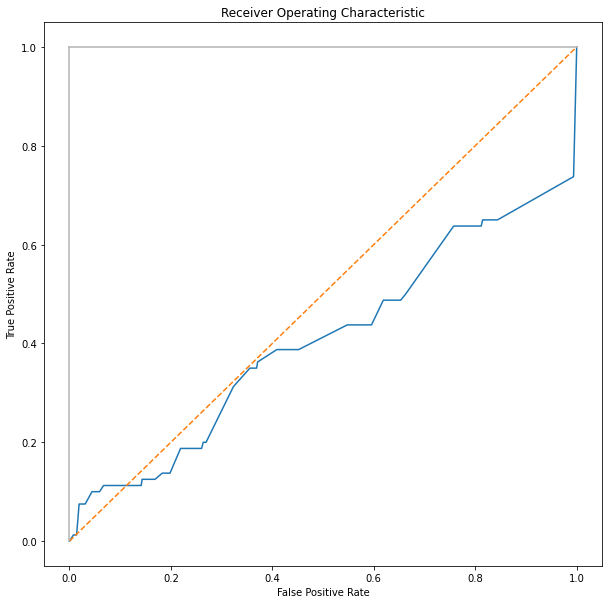

CPU times: user 204 ms, sys: 9 ms, total: 213 ms
Wall time: 216 ms


In [ ]:
# %%time
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# #y_score2 = clf.predict(x_test_sample1)[:,1]

# ##false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# #false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_score2, pos_label=0)

# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_test_pred, pos_label=0)

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#Subset 40 % C = 1.0, kernel = 'poly'

In [ ]:

# %%time
# from sklearn import svm


# clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
# clf3.fit(x_train_sample1, y_train_sample1)

# acc_result3 = clf3.score(x_valid_sample1, y_valid_sample1)
# print('Validation Set Accuracy:', acc_result3)

# acc_result3 = clf3.score(x_test_sample1, y_test_sample1)
# print('Test Set Accuracy:', acc_result3)


[LibSVM]Validation Set Accuracy: 0.06275
Test Set Accuracy: 0.05725
CPU times: user 2h 45min 59s, sys: 8.35 s, total: 2h 46min 7s
Wall time: 2h 45min 21s


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred3 = clf3.predict(x_test_sample1)
# #y_test_pred3=np.argmax(y_test_pred3, axis=1)

# print("accuracy on test set:")
# print(accuracy_score(y_test_sample1, y_test_pred3))
# from sklearn.metrics import classification_report
# print(classification_report(y_test_sample1, y_test_pred3))

accuracy on test set:
0.05725
              precision    recall  f1-score   support

           0       0.22      0.23      0.22        80
           1       0.02      0.93      0.04        80
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00        80
           4       1.00      0.01      0.02        80
           5       0.06      0.03      0.03        80
           6       0.06      0.01      0.02        80
           7       0.00      0.00      0.00        80
           8       0.50      0.05      0.09        80
           9       0.60      0.07      0.13        80
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        80
          14       0.00      0.00      0.00        80
          15       0.04      0.01      0.02        80
          16       0.32      0.11      0.17        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test_sample1, y_test_pred3)
# print(cm)


[[18 34  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  0]
 ...
 [ 0 56  0 ...  0  0  0]
 [ 4 35  0 ...  0  1  0]
 [ 0 33  0 ...  0  0  0]]
CPU times: user 16 ms, sys: 1 µs, total: 16 ms
Wall time: 18.3 ms


ROC CURVE

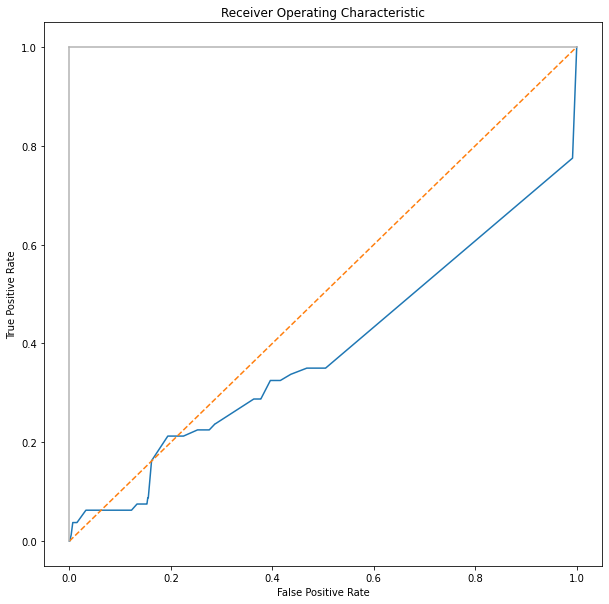

CPU times: user 217 ms, sys: 6 ms, total: 223 ms
Wall time: 223 ms


In [ ]:
# %%time
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# #y_score2 = clf.predict(x_test_sample1)[:,1]

# ##false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# #false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_score2, pos_label=0)

# false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test_sample1, y_test_pred3, pos_label=0)

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate3, true_positive_rate3)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#SVM C= 1.0, kernel = 'rbf' WITH HOG 

In [ ]:
# from skimage.feature import hog
# from skimage import color

In [ ]:
# x_train_sample11 = x_train_sample1.reshape(x_train_sample1.shape[0],32,32,3)
# x_valid_sample11 = x_valid_sample1.reshape(x_valid_sample1.shape[0],32,32,3)
# x_test_sample11 = x_test_sample1.reshape(x_test_sample1.shape[0],32,32,3)

In [ ]:
# %%time
# x_train1 = [ color.rgb2gray(i) for i in x_train_sample11]
# x_valid1 = [ color.rgb2gray(i) for i in x_valid_sample11]
# x_test1 = [ color.rgb2gray(i) for i in x_test_sample11]

CPU times: user 2.41 s, sys: 15 ms, total: 2.42 s
Wall time: 2.44 s


In [ ]:
# %%time
# images_hog = []

# counter = 0
# p_p_c = 8
# x_train_hog = []
# for img in x_train1:
#     f_d,image = hog(img, orientations=8, pixels_per_cell=(p_p_c,p_p_c),cells_per_block=(1, 1),block_norm= 'L2',visualize=True)
#     x_train_hog.append(f_d)
#     images_hog.append(image)
#     counter+=1
#     if counter % 2000 == 0:
#       print("Done " , counter)

# counter = 0
# x_valid_hog = []
# for img in x_valid1:
#     f_d,image = hog(img, orientations=8, pixels_per_cell=(p_p_c,p_p_c),cells_per_block=(1, 1),block_norm= 'L2',visualize=True)
#     x_valid_hog.append(f_d)
#     images_hog.append(image)
#     counter+=1
#     if counter % 2000 == 0:
#       print("Done " , counter)


# counter = 0
# x_test_hog = []
# for img in x_test1:
#     f_d,image = hog(img, orientations=8, pixels_per_cell=(p_p_c,p_p_c),cells_per_block=(1, 1),block_norm= 'L2',visualize=True)
#     x_test_hog.append(f_d)
#     images_hog.append(image)
#     counter+=1
#     if counter % 2000 == 0:
#       print("Done " , counter)
     

Done  2000
Done  4000
Done  6000
Done  8000
Done  10000
Done  12000
Done  14000
Done  16000
Done  18000
Done  20000
Done  22000
Done  24000
Done  26000
Done  28000
Done  2000
Done  4000
Done  6000
Done  8000
Done  10000
Done  12000
Done  2000
Done  4000
Done  6000
Done  8000
CPU times: user 2min 18s, sys: 1.7 s, total: 2min 19s
Wall time: 2min 18s


#plot

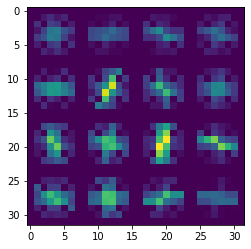

In [ ]:
# plt.imshow(images_hog[11])


reshaping for svm

In [ ]:
# x_train_hog = np.asarray(x_train_hog)
# x_valid_hog = np.asarray(x_valid_hog)
# x_test_hog = np.asarray(x_test_hog)

In [ ]:
# print(x_train_hog.shape)
# print(x_valid_hog.shape)
# print(x_test_hog.shape)

(28000, 128)
(12000, 128)
(8000, 128)


In [ ]:

# %%time
# from sklearn import svm


# clf2 = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
# clf2.fit(x_train_hog, y_train_sample1)

# acc_result2 = clf2.score(x_valid_hog, y_valid_sample1)
# print('Validation Set Accuracy:', acc_result2)

# acc_result2 = clf2.score(x_test_hog, y_test_sample1)
# print('Test Set Accuracy:', acc_result2)


[LibSVM]Validation Set Accuracy: 0.12241666666666666
Test Set Accuracy: 0.121625
CPU times: user 8min 42s, sys: 598 ms, total: 8min 42s
Wall time: 8min 41s


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred2 = clf2.predict(x_test_hog)
# #y_test_pred2=np.argmax(y_test_pred2, axis=1)

# print("accuracy on test set:")
# print(accuracy_score(y_test_sample1, y_test_pred2))
# from sklearn.metrics import classification_report
# print(classification_report(y_test_sample1, y_test_pred2))

accuracy on test set:
0.121625
              precision    recall  f1-score   support

           0       0.33      0.30      0.31        80
           1       0.02      0.03      0.02        80
           2       0.00      0.00      0.00        80
           3       0.09      0.04      0.05        80
           4       0.03      0.03      0.03        80
           5       0.12      0.07      0.09        80
           6       0.04      0.05      0.04        80
           7       0.07      0.09      0.08        80
           8       0.31      0.21      0.25        80
           9       0.26      0.36      0.30        80
          10       0.16      0.24      0.19        80
          11       0.10      0.04      0.05        80
          12       0.25      0.12      0.17        80
          13       0.17      0.12      0.14        80
          14       0.09      0.15      0.12        80
          15       0.15      0.03      0.04        80
          16       0.17      0.16      0.17       

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test_sample1, y_test_pred2 )
# print(cm)


[[24  0  0 ...  1  0  0]
 [ 0  2  0 ...  2  0  2]
 [ 0  3  0 ...  3  1  0]
 ...
 [ 0  1  0 ...  6  2  0]
 [ 1  2  2 ...  1  6  0]
 [ 4  0  0 ...  0  0  5]]
CPU times: user 15.2 ms, sys: 0 ns, total: 15.2 ms
Wall time: 15.8 ms


ROC CURVE

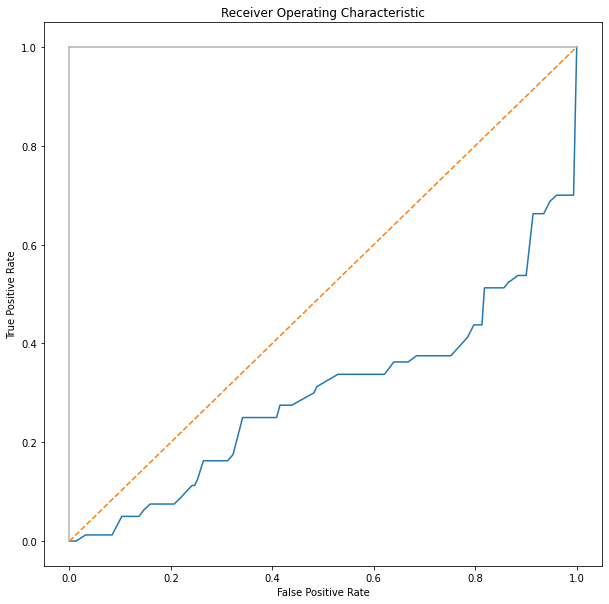

CPU times: user 185 ms, sys: 5.01 ms, total: 190 ms
Wall time: 187 ms


In [ ]:
# %%time
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# #y_score2 = clf.predict(x_test_sample1)[:,1]

# ##false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# #false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_score2, pos_label=0)

# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_test_pred2, pos_label=0)

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#subsample 20% of train, valid and test dataset

subssetting

In [ ]:
# %%time

# from sklearn.model_selection import train_test_split
# x_train_sample1, x_train_sample2, y_train_sample1 , y_train_sample2 = train_test_split(x_train, y_train, 
#                                                     train_size=0.20, 
#                                                     random_state=42,
#                                                     stratify=y_train)

# x_valid_sample1, x_valid_sample2, y_valid_sample1 , y_valid_sample2 = train_test_split(x_valid, y_valid, 
#                                                     train_size=0.20, 
#                                                     random_state=42,
#                                                     stratify=y_valid)


# x_test_sample1, x_test_sample2, y_test_sample1 , y_test_sample2 = train_test_split(x_test, y_test, 
#                                                     train_size=0.20, 
#                                                     random_state=42,
#                                                     stratify=y_test)

CPU times: user 373 ms, sys: 2.65 ms, total: 376 ms
Wall time: 374 ms


SVM

In [ ]:
# %%time
# from sklearn import svm


# clf = svm.SVC(C=0.1, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
# clf.fit(x_train_sample1, y_train_sample1)

# acc_result = clf.score(x_valid_sample1, y_valid_sample1)
# print('Validation Set Accuracy:', acc_result)

# acc_result = clf.score(x_test_sample1, y_test_sample1)
# print('Test Set Accuracy:', acc_result)


[LibSVM]Validation Set Accuracy: 0.07683333333333334
Test Set Accuracy: 0.07325
CPU times: user 42min 58s, sys: 1.87 s, total: 43min
Wall time: 42min 49s


#with feature extraction

In [ ]:
# %%time
# from numpy import load
# # load array
# intermediate_output_train = load('intermediate_output_train10.npy')
# intermediate_output_valid = load('intermediate_output_valid10.npy')
# intermediate_output_test = load('intermediate_output_test10.npy')

Wall time: 4.52 s


In [ ]:
# %%time
# intermediate_output_train = intermediate_output_train.reshape(intermediate_output_train.shape[0],intermediate_output_train.shape[1]*intermediate_output_train.shape[2]*intermediate_output_train.shape[3])
# intermediate_output_valid = intermediate_output_valid.reshape(intermediate_output_valid.shape[0],intermediate_output_valid.shape[1]*intermediate_output_valid.shape[2]*intermediate_output_valid.shape[3])
# intermediate_output_test = intermediate_output_test.reshape(intermediate_output_test.shape[0],intermediate_output_test.shape[1]*intermediate_output_test.shape[2]*intermediate_output_test.shape[3])

Wall time: 0 ns


subssetting

In [ ]:
# %%time

# from sklearn.model_selection import train_test_split
# x_train_sample1, x_train_sample2, y_train_sample1 , y_train_sample2 = train_test_split(intermediate_output_train, y_train, 
#                                                     train_size=0.40, 
#                                                     random_state=42,
#                                                     stratify=y_train)

# x_valid_sample1, x_valid_sample2, y_valid_sample1 , y_valid_sample2 = train_test_split(intermediate_output_valid, y_valid, 
#                                                     train_size=0.40, 
#                                                     random_state=42,
#                                                     stratify=y_valid)


# x_test_sample1, x_test_sample2, y_test_sample1 , y_test_sample2 = train_test_split(intermediate_output_test, y_test, 
#                                                     train_size=0.40, 
#                                                     random_state=42,
#                                                     stratify=y_test)

Wall time: 3.76 s


In [ ]:

# %%time
# from sklearn import svm


# clf2 = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=1, max_iter=-1, decision_function_shape='ovr', random_state=None)
# clf2.fit(x_train_sample1, y_train_sample1)

# acc_result2 = clf2.score(x_valid_sample1, y_valid_sample1)
# print('Validation Set Accuracy:', acc_result2)

# acc_result2 = clf2.score(x_test_sample1, y_test_sample1)
# print('Test Set Accuracy:', acc_result2)


[LibSVM]Validation Set Accuracy: 0.26058333333333333
Test Set Accuracy: 0.0065
Wall time: 3h 39min 23s


get test score result

In [ ]:
# %%time
# from sklearn.metrics import accuracy_score
# y_test_pred2 = clf2.predict(x_test_sample1)
# #y_test_pred2=np.argmax(y_test_pred2, axis=1)

# print("accuracy on test set:")
# print(accuracy_score(y_test_sample1, y_test_pred2))
# from sklearn.metrics import classification_report
# print(classification_report(y_test_sample1, y_test_pred2))

accuracy on test set:
0.0065
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.00      0.00      0.00        80
           2       0.02      0.03      0.02        80
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00        80
           6       0.02      0.04      0.03        80
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00        80
           9       0.00      0.00      0.00        80
          10       0.00      0.00      0.00        80
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00        80
          13       0.00      0.00      0.00        80
          14       0.00      0.00      0.00        80
          15       0.00      0.00      0.00        80
          16       0.00      0.00      0.00        8

plot confusion matrix

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# %%time

# cm = confusion_matrix(y_test_sample1, y_test_pred2 )
# print(cm)


[[ 0  0  0 ...  1  2 39]
 [ 1  0  0 ...  0 35  0]
 [ 1  0  2 ...  5  2  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 2  3  0 ...  3  1  0]
 [ 8  0  0 ...  0  0  0]]
Wall time: 13.7 ms


ROC CURVE

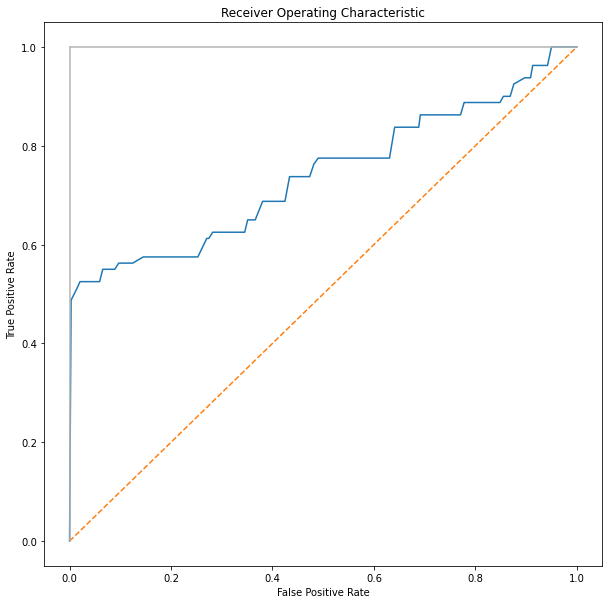

Wall time: 411 ms


In [ ]:
# %%time
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt
# #y_score1 = clf_tree.predict_proba(X_test)[:,1]
# #y_score2 = clf.predict(x_test_sample1)[:,1]

# ##false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
# #false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_score2, pos_label=0)

# false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test_sample1, y_test_pred2, pos_label=0)

# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic')
# plt.plot(false_positive_rate2, true_positive_rate2)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()